<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject #2</div>
<span style="">MicroProject: Illini Football</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/02-illini-football/">https://discovery.cs.illinois.edu/microproject/02-illini-football/</a></div>
</h1>

<hr style="color: #DD3403;">

## Dataset: "illini-football"

The [University of Illinois' Fighting Illini Historical Football Scores Dataset](https://github.com/wadefagen/datasets/tree/master/illini-football) is a dataset maintained as part of [@wadefagen](https://github.com/wadefagen)'s datasets GitHub repository.  This dataset contains a "collection of final scores of every known Fighting Illini football game since 1892, with data on location, homecoming, and national bowl games."

The URL for the CSV dataset is:
```
https://raw.githubusercontent.com/wadefagen/datasets/master/illini-football/illini-football-scores.csv
```

Load the dataset into a DataFrame called `df`:

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/wadefagen/datasets/master/illini-football/illini-football-scores.csv")
df

,Season,Date,Location,Opponent,OpponentRank,Result,IlliniScore,OpponentScore,Note
0,2021,8/28/2021,vs.,Nebraska,NaN,W,30.0,22.0,NaN
1,2021,9/4/2021,vs.,UTSA,NaN,L,30.0,37.0,NaN
2,2021,9/11/2021,@,Virginia,NaN,L,14.0,42.0,NaN
3,2021,9/17/2021,vs.,Maryland,NaN,L,17.0,20.0,NaN
4,2021,9/25/2021,@,Purdue,NaN,L,9.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...
1266,1892,1892-10-29,@,Kansas City A.C.,NaN,W,42.0,0.0,NaN
1267,1892,1892-11-05,vs.,Englewood High,NaN,W,38.0,0.0,NaN
1268,1892,1892-11-16,@,Chicago,NaN,L,4.0,10.0,NaN
1269,1892,1892-11-18,vs.,DePauw,NaN,W,34.0,0.0,NaN


<hr style="color: #DD3403;">

## Puzzle 1: The Best and Worst Games in History

Since 1892, The University of Illinois has played over 1,200 games of football against 130 different schools!  This dataset reports the final score of the same, with a column for the score of the Illini and a column for score of the Opponent.

In the first puzzle, let's find a few interesting games!


### The Worst Game of Illini Football

Let's consider the "worst" game to be the game where the Illini lost by the lost points.  *(This is not the game where the opponent scored the most points, but the game where there score had the biggest difference.)

Create a DataFrame `df_worst` that contains just one row of the very worst game:

In [3]:
df["Lost Point"] = df.OpponentScore - df.IlliniScore

df_worst = df.nlargest(1, "Lost Point")
df_worst

,Season,Date,Location,Opponent,OpponentRank,Result,IlliniScore,OpponentScore,Note,Lost Point
44,2018,11/17/2018,vs.,Iowa,NaN,L,0.0,63.0,NaN,63.0


### The Craziest Game of Illini Football

Let's consider the "craziest" game of Illini Football the game where the **most total points** were scored.

Create a DataFrame `df_craziest` that contains just one row of the very craziest game:

In [18]:
df["Total"] = df.IlliniScore + df.OpponentScore

df_craziest = df.nlargest(1, "Total")
df_craziest

,Season,Date,Location,Opponent,OpponentRank,Result,IlliniScore,OpponentScore,Note,Lost Point,Won Points,TotalScore,Total
140,2010,11/6/2010,@,Michigan,NaN,L,65.0,67.0,NaN,2.0,-2.0,132.0,132.0


### The Best Homecoming Game

In football, the "homecoming game" is a football games played at the team's home stadium and is often accompanied with celebrations all week ("Homecoming Week").  In this dataset, homecoming games are denoted by the `"Note"` column contains the string `"Homecoming"`.

Find the "best" homecoming game, where the Illini won by the most points.  Create a DataFrame `df_homecoming_best` that contains just one row containing the best homecoming game:

In [8]:
g = df[df.Note == "Homecoming"]
df_homecoming_best = g.nlargest(1, "Won Points")
df_homecoming_best

,Season,Date,Location,Opponent,OpponentRank,Result,IlliniScore,OpponentScore,Note,Lost Point,Won Points
565,1973,10/27/1973,vs.,Iowa,NaN,W,50.0,0.0,Homecoming,-50.0,50.0


<hr style="color: #DD3403;">

## Puzzle 2: Are Football Scores Higher in Recent Years?

In the Puzzle 1 analysis, most of games you found were recent.  One hypothesis I have is that *"football games have a higher score recently than they did historically"*.  Let's see if we have data to support this!

Since this data goes all the way back to 1892, let's consider:
- "Recent Games" to be all games played in the 2000 season to today,
- "Historic Games" to be all other games (1999 and earlier)

Create two DataFrames, `df_recent` and `df_historic`, to store the recent and historic games:

In [10]:
df_recent = df[df.Season >= 2000]
df_recent 

,Season,Date,Location,Opponent,OpponentRank,Result,IlliniScore,OpponentScore,Note,Lost Point,Won Points
0,2021,8/28/2021,vs.,Nebraska,NaN,W,30.0,22.0,NaN,-8.0,8.0
1,2021,9/4/2021,vs.,UTSA,NaN,L,30.0,37.0,NaN,7.0,-7.0
2,2021,9/11/2021,@,Virginia,NaN,L,14.0,42.0,NaN,28.0,-28.0
3,2021,9/17/2021,vs.,Maryland,NaN,L,17.0,20.0,NaN,3.0,-3.0
4,2021,9/25/2021,@,Purdue,NaN,L,9.0,13.0,NaN,4.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...
258,2000,10/21/2000,@,Penn State,NaN,L,25.0,39.0,NaN,14.0,-14.0
259,2000,10/28/2000,@,Michigan State,NaN,L,10.0,14.0,NaN,4.0,-4.0
260,2000,11/4/2000,vs.,Indiana,NaN,W,42.0,35.0,NaN,-7.0,7.0
261,2000,11/11/2000,vs.,Ohio State,NaN,L,21.0,24.0,NaN,3.0,-3.0


In [11]:
df_historic = df[df.Season < 2000]
df_historic

,Season,Date,Location,Opponent,OpponentRank,Result,IlliniScore,OpponentScore,Note,Lost Point,Won Points
263,1999,9/4/1999,vs.,Arkansas State,NaN,W,41.0,3.0,NaN,-38.0,38.0
264,1999,9/11/1999,vs.,San Diego State,NaN,W,38.0,10.0,NaN,-28.0,28.0
265,1999,9/18/1999,@,Louisville,NaN,W,41.0,36.0,NaN,-5.0,5.0
266,1999,9/25/1999,vs.,Michigan State,NaN,L,10.0,27.0,NaN,17.0,-17.0
267,1999,10/2/1999,@,Indiana,NaN,L,31.0,34.0,NaN,3.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...
1266,1892,1892-10-29,@,Kansas City A.C.,NaN,W,42.0,0.0,NaN,-42.0,42.0
1267,1892,1892-11-05,vs.,Englewood High,NaN,W,38.0,0.0,NaN,-38.0,38.0
1268,1892,1892-11-16,@,Chicago,NaN,L,4.0,10.0,NaN,6.0,-6.0
1269,1892,1892-11-18,vs.,DePauw,NaN,W,34.0,0.0,NaN,-34.0,34.0


### Average Points Scored

Using your two datasets, find the **average total** points scored in recent games and historic games.

In [13]:
df_recent["Total Points"] = (df_recent.IlliniScore + df_recent.OpponentScore)
recent_avg_score = df_recent["Total Points"].mean()
recent_avg_score

C:\Users\kubas\AppData\Local\Temp\ipykernel_31112\2740068547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent["Total Points"] = (df_recent.IlliniScore + df_recent.OpponentScore)


52.603053435114504

In [14]:
df_historic["Total Points"] = (df_historic.IlliniScore + df_historic.OpponentScore)
historic_avg_score = df_historic["Total Points"].mean()
historic_avg_score

C:\Users\kubas\AppData\Local\Temp\ipykernel_31112\2939608411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_historic["Total Points"] = (df_historic.IlliniScore + df_historic.OpponentScore)


32.67162698412698

<hr style="color: #DD3403;">

## Puzzle 3: Create a Bar Chart

Finally, let's create a bar chart of the total number of points per season!

To do this, set up a DataFrame in the following way:
- In your DataFrame `df`, create a column called `TotalScore` for every game.
- Each row must be a **season** of football -- not just a single game.
- Store the DataFrame, that is ready to be graphed, as `df_points_per_season`.

In [15]:
df["TotalScore"] = (df.IlliniScore + df.OpponentScore)
df_points_per_season = df.groupby("Season").agg("sum").reset_index()
df_points_per_season

,Season,OpponentRank,IlliniScore,OpponentScore,Lost Point,Won Points,TotalScore
0,1892,0.0,240.0,92.0,-148.0,148.0,332.0
1,1893,0.0,156.0,106.0,-50.0,50.0,262.0
2,1894,0.0,182.0,66.0,-116.0,116.0,248.0
3,1895,0.0,215.0,28.0,-187.0,187.0,243.0
4,1896,0.0,148.0,36.0,-112.0,112.0,184.0
...,...,...,...,...,...,...,...
125,2017,0.0,185.0,378.0,193.0,-193.0,563.0
126,2018,0.0,312.0,473.0,161.0,-161.0,785.0
127,2019,0.0,347.0,340.0,-7.0,7.0,687.0
128,2020,56.0,161.0,279.0,118.0,-118.0,440.0


### Create the Graph

Once you have a DataFrame all set up, the plot is the easy part!

<AxesSubplot:xlabel='Season'>

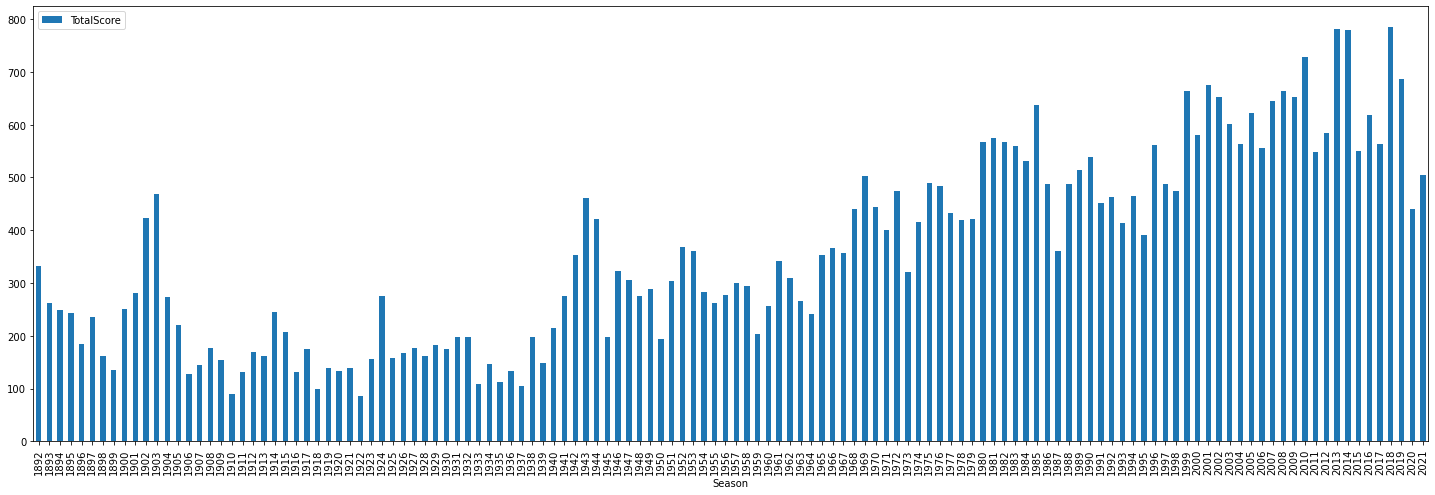

In [16]:
df_points_per_season.reset_index().plot.bar(x="Season", y="TotalScore", figsize=(25, 8))

<hr style="color: #DD3403;">

## 🔬 Microproject Checkpoint Tests 🔬

In [19]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for the microproject.
# - If this cell runs without any error in the output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cells, make changes, and RE-RUN your code and then this cell.

import math
tada = "\N{PARTY POPPER}"
OS = 7
IS = 7 - 1

assert( 'df' in vars() ), "You appear to not have the correct dataset loaded in `df`."
assert( len(df) > 1200 ), "You appear to not have the correct dataset loaded in `df`."
assert( "IlliniScore" in df ), "You appear to not have the correct dataset loaded in `df`."
assert( "OpponentScore" in df ), "You appear to not have the correct dataset loaded in `df`."

assert( 'df_worst' in vars() ), "Puzzle #1 appears incorrect."
assert( len(df_worst) == 1 ), "Puzzle #1 appears incorrect."
assert( 'df_craziest' in vars() ), "Puzzle #1 appears incorrect."
assert( len(df_craziest) == 1 ), "Puzzle #1 appears incorrect."
assert( 'df_homecoming_best' in vars() ), "Puzzle #1 appears incorrect."
assert( len(df_homecoming_best) == 1 ), "Puzzle #1 appears incorrect."

__tdf = df.dropna(subset=["IlliniScore"])
__tdfh = __tdf[__tdf.Note == "Homecoming"]
assert( df_worst.iloc[0].OpponentScore == __tdf.loc[(__tdf.iloc[:, OS] - __tdf.iloc[:, IS]).sort_values().index].iloc[-1, OS] ), "Puzzle #1 appears incorrect."
assert( df_craziest.iloc[0].OpponentScore == __tdf.loc[(__tdf.iloc[:, OS] + __tdf.iloc[:, IS]).sort_values().index].iloc[-1, OS] ), "Puzzle #1 appears incorrect."
assert( df_homecoming_best.iloc[0].IlliniScore == __tdfh.loc[(__tdfh.iloc[:, OS] - __tdfh.iloc[:, IS]).sort_values().index].iloc[0, IS] ), "Puzzle #1 appears incorrect."
assert( df_homecoming_best.iloc[0].OpponentScore == __tdfh.loc[(__tdfh.iloc[:, OS] - __tdfh.iloc[:, IS]).sort_values().index].iloc[0, OS] ), "Puzzle #1 appears incorrect."

print(f"{tada} Puzzle 1: All Tests Passed! {tada}")


assert( 'df_recent' in vars() ), "Puzzle #2 appears incorrect."
assert( len(df_recent) > 260 ), "Puzzle #2 appears incorrect."
assert( 'df_historic' in vars() ), "Puzzle #2 appears incorrect."
assert( len(df_historic) == 1008 ), "Puzzle #2 appears incorrect."
assert( len(df_historic) + len(df_recent) == len(df) ), "Puzzle #2 appears incorrect."
__tdfg = __tdf.assign( C = __tdf.apply(lambda row: row["Season"] < 2000, axis=1) ).groupby("C").describe()
assert( math.isclose(recent_avg_score, sum(__tdfg.loc[False].iloc[[17, 25]])) ), "Puzzle #2 appears incorrect."
assert( math.isclose(historic_avg_score, sum(__tdfg.loc[True].iloc[[17, 25]])) ), "Puzzle #2 appears incorrect."

print(f"{tada} Puzzle 2: All Tests Passed! {tada}")

assert( 'df_points_per_season' in vars() ), "Puzzle #3 appears incorrect."
assert( math.isclose(df_points_per_season[ df_points_per_season.Season == 2018 ]["TotalScore"], 785) ), "Puzzle #3 appears incorrect."
assert( math.isclose(df_points_per_season[ df_points_per_season.Season == 2014 ]["TotalScore"], 779) ), "Puzzle #3 appears incorrect."

print(f"{tada} Puzzle 3: All Tests Passed! {tada}")

print(f"{tada}{tada} All Tests Passed! {tada}{tada}")


🎉 Puzzle 1: All Tests Passed! 🎉
🎉 Puzzle 2: All Tests Passed! 🎉
🎉 Puzzle 3: All Tests Passed! 🎉
🎉🎉 All Tests Passed! 🎉🎉


<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the instructions to commit and grade this MicroProject!
